# Exercise 2: Decision Trees

In this assignment you will implement a Decision Tree algorithm as learned in class.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
2. Write **efficient vectorized** code whenever possible. Some calculations in this exercise take several minutes when implemented efficiently, and might take much longer otherwise. Unnecessary loops will result in point deduction.
3. You are responsible for the correctness of your code and should add as many tests as you see fit. Tests will not be graded nor checked.
4. Write your functions in this notebook only. **Do not create Python modules and import them**.
5. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. **Do not import anything else.**
6. Your code must run without errors. During the environment setup, you were given a specific version of `numpy` to install (1.15.4). Changes of the configuration we provided are at your own risk. Any code that cannot run will not be graded.
7. Write your own code. Cheating will not be tolerated.
8. Submission includes this notebook only with the exercise number and your ID as the filename. For example: `hw1_123456789_987654321.ipynb` if you submitted in pairs and `hw1_123456789.ipynb` if you submitted the exercise alone.
9. Answers to qualitative questions should be written in **markdown** cells (with $\LaTeX$ support). Answers that will be written in commented code blocks will not be checked.

## In this exercise you will perform the following:
1. Practice OOP in python.
2. Implement two impurity measures: Gini and Entropy.
3. Construct a decision tree algorithm.
4. Prune the tree to achieve better results.
5. Visualize your results.

### I have read and understood the instructions: 309797827  305494452

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Warmup - OOP in python

Our desicion tree will be implemented using a dedicated python class. Python classes are very similar to classes in Java.


You can use the following [site](https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/) to learn about classes in python.

In [2]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, node):
        self.children.append(node)

In [3]:
n = Node(5)
p = Node(6)
q = Node(1)
n.add_child(p)
n.add_child(q)
n.children

[<__main__.Node at 0x293ae03d1c8>, <__main__.Node at 0x293ae03d248>]

## Data preprocessing

For the following exercise, we will use a dataset containing mushroom data `agaricus-lepiota.csv`. 

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous
one (=there are only two classes **edible** and **poisonous**). 
    
The dataset contains 8124 observations with 22 features:
1. cap-shape: bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
4. bruises: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

First, we will read and explore the data using pandas and the `.read_csv` method. Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [4]:
# load dataset
data = pd.read_csv('agaricus-lepiota.csv')

One of the advantages of the Decision Tree algorithm is that almost no preprocessing is required. However, finding missing values is always required.

In [5]:
#############################################################################
# TODO: Find the column\s with missing values and remove them from the data.#
#############################################################################
#Delete all column with empty string and Nan values from data
NaNValue=float("NaN")
data.replace("",NaNValue, inplace=True)
data=data.dropna(axis=1,how='any')
data.shape
#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################

(8124, 22)

We will split the dataset to `Training` and `Test` sets

In [6]:
from sklearn.model_selection import train_test_split
# Making sure the last column will hold the labels
X, y = data.drop('class', axis=1), data['class']
X = np.column_stack([X,y])
# split dataset using random_state to get the same split each time
X_train, X_test = train_test_split(X, random_state=99)

print("Training dataset shape: ", X_train.shape)
print("Testing dataset shape: ", X_test.shape)

Training dataset shape:  (6093, 22)
Testing dataset shape:  (2031, 22)


In [7]:
y.shape

(8124,)

## Impurity Measures

(5 points each - 10 points total)

Impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Implement the functions `calc_gini` and `calc_entropy`. You are encouraged to test your implementation.

In [8]:
def calc_gini(data):
    """
    Calculate gini impurity measure of a dataset.
          
    Input:
    - data: any dataset where the last column holds the labels.
 
    Returns the gini impurity.    
    """
    gini = 0.0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    #Get data classification column
    npClassification = np.array(data[:,-1])
    #Get 2 numpy arrays, unique string name feature, array with the amount of apperancess of each feature coordinated
    npUniqueClassification, npCountClassification = np.unique(npClassification,return_counts = True)
    # Gini index calculation
    npClassificationProb = npCountClassification / npClassification.shape
    npClassificationProbPow = np.square(npClassificationProb)
    gini = 1 - (np.sum(npClassificationProbPow))
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return gini

In [9]:
def calc_entropy(data):
    """
    Calculate the entropy of a dataset.

    Input:
    - data: any dataset where the last column holds the labels.

    Returns the entropy of the dataset.    
    """
    entropy = 0.0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    #Get data classification column
    npClassification = np.array(data[:,-1])
    #Get 2 numpy arrays, unique string name feature, array with the amount of apperancess of each feature coordinated
    npUniqueClassification, npCountClassification = np.unique(npClassification,return_counts = True)
    # Entropy index calculation
    npClassificationProb = npCountClassification / npClassification.shape
    npClassificationProbLog=np.log2(npClassificationProb)
    entropy=(-1)*np.sum(npClassificationProb*npClassificationProbLog)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return entropy

In [10]:
##### Your Tests Here #####
print(calc_gini(X_train))
print(calc_entropy(X_train))

0.4993774351913738
0.99910164235515


## Goodness of Split

(10 Points)

Given a feature the Goodnees of Split measures the reduction in the impurity if we split the data according to the feature.
$$
\Delta\varphi(S, A) = \varphi(S) - \sum_{v\in Values(A)} \frac{|S_v|}{|S|}\varphi(S_v)
$$

In our implementation the goodness_of_split function will return either the Goodness of Split or the Gain Ratio as learned in class. You'll control the return value with the `gain_ratio` parameter. If this parameter will set to False (the default value) it will return the regular Goodness of Split. If it will set to True it will return the Gain Ratio.
$$
GainRatio(S,A)=\frac{InformationGain(S,A)}{SplitInformation(S,A)}
$$
Where:
$$
InformationGain(S,A)=Goodness\ of\ Split\ calculated\ with\ Entropy\ as\ the\ Impurity\ function \\
SplitInformation(S,A)=- \sum_{a\in A} \frac{|S_a|}{|S|}\log\frac{|S_a|}{|S|}
$$
NOTE: you can add more parameters to the function and you can also add more returning variables (The given parameters and the given returning variable should not be touch).

In [11]:
def goodness_of_split(data, feature, impurity_func, gain_ratio=False):
    """
    Calculate the goodness of split of a dataset given a feature and impurity function.

    Input:
    - data: any dataset where the last column holds the labels.
    - feature: the feature index.
    
    - impurity func: a function that calculates the impurity.
    - gain_ratio: goodness of split or gain ratio flag.

    Returns the goodness of split (or the Gain Ration).  
    """
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################   
    index = 0    
    npFeature = np.array(data[:,feature])
    npLabel = np.array(data[:,-1])
    #Combine the feature and label columns
    npFeatureAndLabel = np.column_stack((npFeature,npLabel))
    #Get 2 numpy arrays, unique string name feature, array with the amount of apperancess of each feature coordinated    
    npUniqueFeaturesValues, npCountFeaturesValues = np.unique(npFeature,return_counts = True)    
    npFeaturesValueProb = npCountFeaturesValues / len(npFeature)  
    
    #To prevent impurity_func=gini and gain_ratio=True
    if(gain_ratio == True):
        impurityOfS = calc_entropy(npFeatureAndLabel)
    else:
        impurityOfS=impurity_func(npFeatureAndLabel)
    
    for currentFeatureValue in npUniqueFeaturesValues:
        #Delete all rows of feature that dont contain the current value
        npCurrentFeatureValueAndLabel = npFeatureAndLabel[(npFeatureAndLabel[:,0] == currentFeatureValue)]
        if(gain_ratio == True):
             impurityBaseFeatureValue = calc_entropy(npCurrentFeatureValueAndLabel)
        else:
             impurityBaseFeatureValue = impurity_func(npCurrentFeatureValueAndLabel) 
        #Calculate the inner mathematical expression of sigma         
        impurityBaseFeatureValue = impurityBaseFeatureValue * npFeaturesValueProb[index]       
        impurityOfS = impurityOfS - impurityBaseFeatureValue
        index = index + 1
    if(gain_ratio == False):
        goodness =  impurityOfS
    else:
        splitInformation = np.sum(np.dot((npFeaturesValueProb),np.log2(npFeaturesValueProb)))
        if(splitInformation != 0):
            goodness = impurityOfS / ((-1)*splitInformation)
        else:
            return 0;

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return goodness    

## Building a Decision Tree

(30 points)

Use a Python class to construct the decision tree. Your class should support the following functionality:

1. Initiating a node for a decision tree. You will need to use several class methods and class attributes and you are free to use them as you see fit. We recommend that every node will hold the feature and value used for the split and its children.
2. Your code should support both Gini and Entropy as impurity measures. 
3. The provided data includes categorical data. In this exercise, when splitting a node create the number of children needed according to the attribute unique values.

Complete the class `DecisionNode`. The structure of this class is entirely up to you. 

Complete the function `build_tree`. This function should get the training dataset and the impurity as inputs, initiate a root for the decision tree and construct the tree according to the procedure you learned in class.

In [12]:
class DecisionNode:

    # This class will hold everything you require to construct a decision tree.
    # The structure of this class is up to you. However, you need to support basic 
    # functionality as described above. It is highly recommended that you 
    # first read and understand the entire exercise before diving into this class.
    
        def __init__(self,splitFeature,valueOfFatherfeature , featureListNotUsed, depth,father, twoDClassificationArray):
            self.splitFeature = splitFeature # column index of criteria being tested
            self.valueOfFatherfeature = valueOfFatherfeature # 
            self.twoDClassificationArray=twoDClassificationArray.copy()
            self.children = []
            self.featureListNotUsed = featureListNotUsed.copy()
            self.depth = depth
            self.father = father
            self.pred=None
        
        #Add child to current node children list
        def add_child(self, node):        
            self.children.append(node)
        
        #Check if current node is monochromatic
        def isPure (self):
            return (len(self.twoDClassificationArray)==1)
         
        #Set the predication for current node     
        def set_mypred(self):
            maximalRowIndex=np.argmax(self.twoDClassificationArray[:,1])
            predication=self.twoDClassificationArray[maximalRowIndex][0]
            self.pred = predication
       
        # The method find the best feature for split the node, according to the given data
        #Side effect: delete the feature from node's featureListNotUsed list
        def set_feature_for_spilt (self,featureList, data, impurity, gain_ratio=False):                       
            maxFeature=None
            maxGoodnessOfSplit=None
            for i in range(len(featureList)):
                currentGoodnessOfSplit = goodness_of_split(data,featureList[i], impurity, gain_ratio)              
                if((maxFeature==None) or (maxGoodnessOfSplit < currentGoodnessOfSplit)):
                    maxFeature=featureList[i]
                    maxGoodnessOfSplit=currentGoodnessOfSplit
            #Check if split isn't improve the tree
            if(maxGoodnessOfSplit!=0):
                self.splitFeature = maxFeature
            return maxGoodnessOfSplit            
       
        #Remove the chosen feature from current featureListNotUsed list  
        def delete_current_feature_from_list(self):
            self.featureListNotUsed.remove(self.splitFeature)
         
        #Recursive method build the tree that current node is the root
        def build_tree(self, data, impurity, gain_ratio, max_depth, chi,chi_table = None):
            chi_check=False
            #Stop condition for the recursive call
            if((self.isPure() == True) or (len(self.featureListNotUsed) == 0) or (max_depth <= 0)):
                return
            else:
                maxGoodnessOfSplit=self.set_feature_for_spilt(self.featureListNotUsed, data, impurity, gain_ratio) 
                if(maxGoodnessOfSplit!=0):
                    chi_check = self.calc_chisquare(data, chi, chi_table)
                    #Check for pre proning
                    if((chi_check == True) or (self.splitFeature=="leaf")):
                        return
                    else:
                        self.delete_current_feature_from_list()
                        #Add children to the current node
                        self.add_children(data.copy(), impurity, gain_ratio, max_depth, chi, chi_table)
                        
        #Add all children to the current node according to the chosen feature for split
        def add_children(self, data, impurity, gain_ratio, max_depth, chi,chi_table = None):
            npFeature = np.array(data[:,self.splitFeature])
            #Get 2 numpy arrays, unique string name feature, array with the amount of apperancess of each feature coordinated
            npUniqueFeaturesValues, npCountFeaturesValues = np.unique(npFeature,return_counts = True)
            for featureValue in npUniqueFeaturesValues:
                cleanDataForChild = data[(data[:,self.splitFeature] == featureValue )].copy()
                npUniqueLabelValues, npCountLabelValues = np.unique(np.array(cleanDataForChild[:,-1]),return_counts = True)
                npUniqueCountAndLabel = np.column_stack((npUniqueLabelValues,npCountLabelValues))
                #Create new node as a child
                nodeToAdd = DecisionNode('leaf', featureValue, self.featureListNotUsed, self.depth + 1, self, npUniqueCountAndLabel)
                nodeToAdd.set_mypred()
                self.add_child(nodeToAdd)
                #Build the tree that new node is the root
                nodeToAdd.build_tree(cleanDataForChild, impurity, gain_ratio, max_depth - 1, chi, chi_table)
                
        def calc_chisquare(self, data, chi, chi_table = None):
            #Check that params are valid
            if(chi >= 1 or chi_table == None):
                return False
            else:
                sumSigma = 0.0
                #Calculate the relevant variable to the formula
                totalInstances=np.sum(self.twoDClassificationArray[:,1])                
                probForEdible=float(self.twoDClassificationArray[self.twoDClassificationArray[:,0]=='e'][0,1])/totalInstances
                probForPoision=float(self.twoDClassificationArray[self.twoDClassificationArray[:,0]=='p'][0,1])/totalInstances
                npFeature = np.array(data[:,self.splitFeature])         
                npUniqueFeaturesValues, npCountFeaturesValues = np.unique(npFeature,return_counts = True)
                for featureValue in npUniqueFeaturesValues:
                    cleanDataForChild = data[(data[:,self.splitFeature] == featureValue )].copy()
                    npUniqueLabelValues, npCountLabelValues = np.unique(np.array(cleanDataForChild[:,-1]),return_counts = True)
                    npUniqueCountAndLabel = np.column_stack((npUniqueLabelValues,npCountLabelValues))                
                    numberOfFeatureValueEdible = len(cleanDataForChild[cleanDataForChild[:,-1]=='e'][:,0])
                    numberOfFeatureValuePoisen =  len(cleanDataForChild[cleanDataForChild[:,-1]=='p'][:,0])
                    numOfInstancesWithValue=len(cleanDataForChild[:,0])
                    sumSigma = sumSigma + (np.square(numberOfFeatureValueEdible - (numOfInstancesWithValue * probForEdible))) / (numOfInstancesWithValue * probForEdible)
                    sumSigma = sumSigma + (np.square(numberOfFeatureValuePoisen - (numOfInstancesWithValue * probForPoision))) / (numOfInstancesWithValue * probForPoision)
                #Return boolean result according to the chi table    
                return chi_table[len(npUniqueFeaturesValues) - 1][chi] >= sumSigma
            
        #Return the amount of poision in current node 
        def getAmountOfPoision(self):
            poisionLabelRow=self.twoDClassificationArray[self.twoDClassificationArray[:,0]=='p']
            if(len(poisionLabelRow)!=0):
                return self.twoDClassificationArray[self.twoDClassificationArray[:,0]=='p'][0,1]
            else:
                return 0
            
        #Return the amount of edible in current node 
        def getAmountOfEdible(self):
            edibleLabelRow=self.twoDClassificationArray[self.twoDClassificationArray[:,0]=='e']
            if(len(edibleLabelRow)!=0):
                return self.twoDClassificationArray[self.twoDClassificationArray[:,0]=='e'][0,1]
            else:
                return 0
            
        #Return the maximal depth of tree that current node is the root 
        def getMaxDepthOfTree(self, currentMaxDepth):            
            for currentChild in self.children:
                if(currentMaxDepth < currentChild.depth):                    
                    currentMaxDepth=currentChild.depth
                currentMaxDepth = currentChild.getMaxDepthOfTree(currentMaxDepth)
            return currentMaxDepth
            
            

In [13]:
#####################################################
################# Debug Code ########################
#####################################################
def printChildrenList(childrenList):
    print("My children")
    for child in childrenList:
        print(child.valueOfFatherfeature)
        
def printIndexAndLabel(data):
    columnsList=list(data.columns)
    data=data.to_numpy()
    for i in range(len(columnsList)):        
        currentFeatureForSplit=i
        npFeature = np.array(data[:,currentFeatureForSplit])
        npLabels = np.array(data[:,-1])        
        npUniqueFeaturesValues, npCountFeaturesValues = np.unique(npFeature,return_counts = True)   
    
        print ("Feature number: "+str(i)+ ", is: "+str(columnsList[i])+", My values are: "+str(npUniqueFeaturesValues))
        
printIndexAndLabel(data)

def printTreeUpToDown(node,depth):
    if(node!=None):        
        if(depth==node.depth and node.depth!=0):
                print("\nIm the node on depth: "+str(node.depth)+"\nMy value is: "+str(node.valueOfFatherfeature)+"\nMy feature is: "+str(node.splitFeature)+"\nMy father value is: "+str(node.father.valueOfFatherfeature)+"\nI can choose from features list: "+str(node.featureListNotUsed)+"\nPoision Vs Edible: "+str(node.twoDClassificationArray))
        if(depth==node.depth and node.depth==0):
                print("\nIm the node on depth: "+str(node.depth)+"\nMy value is: "+str(node.valueOfFatherfeature)+"\nMy feature is: "+str(node.splitFeature)+"\nI can choose from features list: "+str(node.featureListNotUsed)+"\nPoision Vs Edible: "+str(node.twoDClassificationArray))
        for child in node.children:
            printTreeUpToDown(child,depth)    
       

Feature number: 0, is: cap-shape, My values are: ['b' 'c' 'f' 'k' 's' 'x']
Feature number: 1, is: cap-surface, My values are: ['f' 'g' 's' 'y']
Feature number: 2, is: cap-color, My values are: ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
Feature number: 3, is: bruises, My values are: ['f' 't']
Feature number: 4, is: odor, My values are: ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
Feature number: 5, is: gill-attachment, My values are: ['a' 'f']
Feature number: 6, is: gill-spacing, My values are: ['c' 'w']
Feature number: 7, is: gill-size, My values are: ['b' 'n']
Feature number: 8, is: gill-color, My values are: ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
Feature number: 9, is: stalk-shape, My values are: ['e' 't']
Feature number: 10, is: stalk-surface-above-ring, My values are: ['f' 'k' 's' 'y']
Feature number: 11, is: stalk-surface-below-ring, My values are: ['f' 'k' 's' 'y']
Feature number: 12, is: stalk-color-above-ring, My values are: ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
Feature numb

In [14]:
def build_tree(data, impurity, featureList, gain_ratio=False, chi=1, max_depth=1000, chi_table = None):
    """
    Build a tree using the given impurity measure and training dataset. 
    You are required to fully grow the tree until all leaves are pure. 

    Input:
    - data: the training dataset.
    - impurity: the chosen impurity measure. Notice that you can send a function
                as an argument in python.
    - gain_ratio: goodness of split or gain ratio flag

    Output: the root node of the tree.
    """
    root = None
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################    
    featureListNotUsed=list(range(0,data.shape[1]-1))
    #Get 2 numpy arrays, unique string name feature, array with the amount of apperancess of each feature coordinated
    npUniqueLabelValues, npCountLabelValues = np.unique(np.array(data[:,-1]),return_counts = True)
    #Combine the feature and label columns                       
    npUniqueCountAndLabel = np.column_stack((npUniqueLabelValues,npCountLabelValues))
    #Create the root node of tree
    root = DecisionNode('leaf','ROOT' , featureListNotUsed, 0, None, npUniqueCountAndLabel)
    root.set_mypred()
    #Build the tree
    root.build_tree(data, impurity, gain_ratio, max_depth , chi, chi_table)    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return root

In [15]:
# python support passing a function as arguments to another function.
currentFeatureList = list(range(0,len(X_train[0])-1))
tree_gini = build_tree(X_train, calc_gini,currentFeatureList) # gini and goodness of split
tree_entropy = build_tree(X_train, calc_entropy,currentFeatureList) # entropy and goodness of split
tree_entropy_gain_ratio = build_tree(X_train, calc_entropy, currentFeatureList,gain_ratio=True) # entropy and gain ratio

## Tree evaluation

(10 points) 

Complete the functions `predict` and `calc_accuracy`. 

In [16]:
def predict(node, instance):
    """
    Predict a given instance using the decision tree
 
    Input:
    - root: the root of the decision tree.
    - instance: an row vector from the dataset. Note that the last element 
                of this vector is the label of the instance.
 
    Output: the prediction of the instance.
    """
    pred = None
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    #Initialize the current node children list
    currentNodeChildrenList=node.children
    #Check if node isn't a leaf    
    if(node.splitFeature != 'leaf'):
        currentSplitFeatureIndex=node.splitFeature
        valueFeatureOfInstance=instance[currentSplitFeatureIndex]
        for currentChild in currentNodeChildrenList:
            if(valueFeatureOfInstance==currentChild.valueOfFatherfeature):                
                return predict(currentChild,instance)   
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return node.pred

In [17]:
def calc_accuracy(node, dataset):
    """
    Predict a given dataset using the decision tree
 
    Input:
    - node: a node in the decision tree.
    - dataset: the dataset on which the accuracy is evaluated
 
    Output: the accuracy of the 
    decision tree on the given dataset (%).
    """
    accuracy = 0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    countOfRightPred=0.0
    for i in range(len(dataset[:,0])):  
        currentPred = predict(node, dataset[i,:])
        #Check if our prediction equal the test label
        if(currentPred==dataset[i,-1]):
            countOfRightPred=countOfRightPred+1    
    x=countOfRightPred/len(dataset[:,0])    
    accuracy=x * 100
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return accuracy 

After building the three trees using the training set, you should calculate the accuracy on the test set. For each tree print the training and test accuracy. Select the tree that gave you the best test accuracy. For the rest of the exercise, use that tree (when you asked to build another tree use the same impurity function and same gain_ratio flag). 

In [18]:
#### Your code here ####
currentFeatureList = list(range(0,len(X_train[0])-1))
tree_gini = build_tree(X_train, calc_gini,currentFeatureList ) # gini and goodness of split
tree_entropy = build_tree(X_train, calc_entropy,currentFeatureList ) # entropy and goodness of split
tree_entropy_gain_ratio = build_tree(X_train, calc_entropy,currentFeatureList , gain_ratio=True) # entropy and gain ratio

print(calc_accuracy(tree_gini,X_train))
print(calc_accuracy(tree_gini, X_test))
print(calc_accuracy(tree_entropy, X_train))
print(calc_accuracy(tree_entropy, X_test))
print(calc_accuracy(tree_entropy_gain_ratio, X_train))
print(calc_accuracy(tree_entropy_gain_ratio, X_test))

99.24503528639423
77.5972427375677
99.40915805022156
77.30182176267849
99.63892991957984
78.58197932053176


## Depth pruning

(15 points)

Consider the following max_depth values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]. For each value, construct a tree and prune it according to the max_depth value = don't let the tree to grow beyond this depth. Next, calculate the training and testing accuracy.<br>
On a single plot, draw the training and testing accuracy as a function of the max_depth. Mark the best result on the graph with red circle.

[50.61546036 88.52781881 88.52781881 89.31560807 89.56179222 88.87247661
 87.39537174 85.22895126 83.89955687 82.17626785]


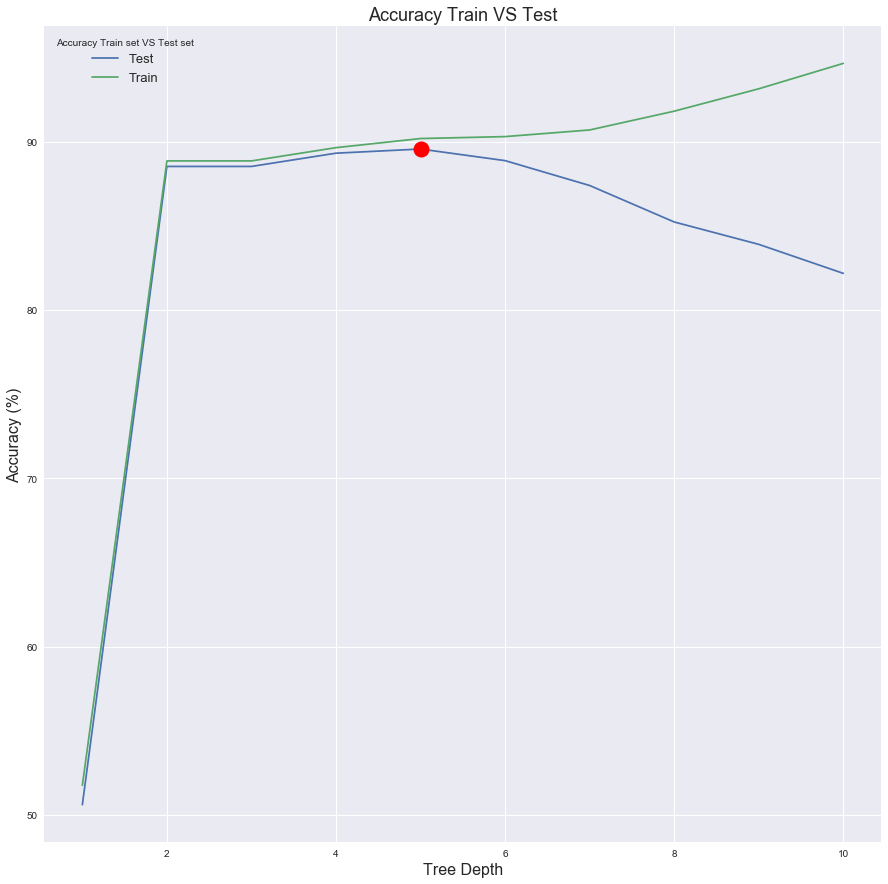

In [19]:
#### Your code here ####
plt.style.use('seaborn')
fig = plt.figure(figsize=(15,15))

npTestArray = np.arange(10.0) 
npTrainArray = np.arange(10.0)

for i in range (0,10):
    currentFeatureList = list(range(0,len(X_train[0])-1))
    rootI = build_tree(X_train, calc_entropy, currentFeatureList, True,1,i)
    npTrainArray[i] = calc_accuracy(rootI,X_train)
    npTestArray[i] = calc_accuracy(rootI,X_test)

#Mark the best result on the test data
maxTest = np.array(np.amax(npTestArray))
indexMaxTest = np.where(npTestArray == maxTest)[0][0] + 1
plt.plot(np.arange(1,1 + len(npTestArray)),npTestArray,label='Test',markevery = indexMaxTest)
plt.plot(np.arange(1,1 + len(npTrainArray)),npTrainArray,label='Train')
plt.xlabel('Tree Depth',fontsize='16')
plt.ylabel('Accuracy (%)',fontsize='16')
plt.legend(loc='upper left',fontsize='13',title='Accuracy Train set VS Test set')
plt.title ('Accuracy Train VS Test', fontsize = '18')
plt.plot(indexMaxTest,maxTest, marker='o', linestyle='-', color='red',markersize = 16)
plt.show()    

## Chi square pre-pruning

(15 points)

Consider the following p-value cut-off values: [1 (no pruning), 0.5, 0.25, 0.1, 0.05, 0.0001 (max pruning)]. For each value, construct a tree and prune it according to the cut-off value. Next, calculate the training and testing accuracy. <br>
On a single plot, draw the training and testing accuracy as a function of the tuple (p-value, tree depth). Mark the best result on the graph with red circle.

In [20]:
### Chi square table values ###
# The first key is the degree of freedom 
# The second key is the p-value cut-off
# The values are the chi-statistic that you need to use in the pruning
chi_table = {1: {0.5 : 0.45,
                 0.25 : 1.32,
                 0.1 : 2.71,
                 0.05 : 3.84,
                 0.0001 : 100000},
             2: {0.5 : 1.39,
                 0.25 : 2.77,
                 0.1 : 4.60,
                 0.05 : 5.99,
                 0.0001 : 100000},
             3: {0.5 : 2.37,
                 0.25 : 4.11,
                 0.1 : 6.25,
                 0.05 : 7.82,
                 0.0001 : 100000},
             4: {0.5 : 3.36,
                 0.25 : 5.38,
                 0.1 : 7.78,
                 0.05 : 9.49,
                 0.0001 : 100000},
             5: {0.5 : 4.35,
                 0.25 : 6.63,
                 0.1 : 9.24,
                 0.05 : 11.07,
                 0.0001 : 100000},
             6: {0.5 : 5.35,
                 0.25 : 7.84,
                 0.1 : 10.64,
                 0.05 : 12.59,
                 0.0001 : 100000},
             7: {0.5 : 6.35,
                 0.25 : 9.04,
                 0.1 : 12.01,
                 0.05 : 14.07,
                 0.0001 : 100000},
             8: {0.5 : 7.34,
                 0.25 : 10.22,
                 0.1 : 13.36,
                 0.05 : 15.51,
                 0.0001 : 100000},
             9: {0.5 : 8.34,
                 0.25 : 11.39,
                 0.1 : 14.68,
                 0.05 : 16.92,
                 0.0001 : 100000},
             10: {0.5 : 9.34,
                  0.25 : 12.55,
                  0.1 : 15.99,
                  0.05 : 18.31,
                  0.0001 : 100000},
             11: {0.5 : 10.34,
                  0.25 : 13.7,
                  0.1 : 17.27,
                  0.05 : 19.68,
                  0.0001 : 100000}}

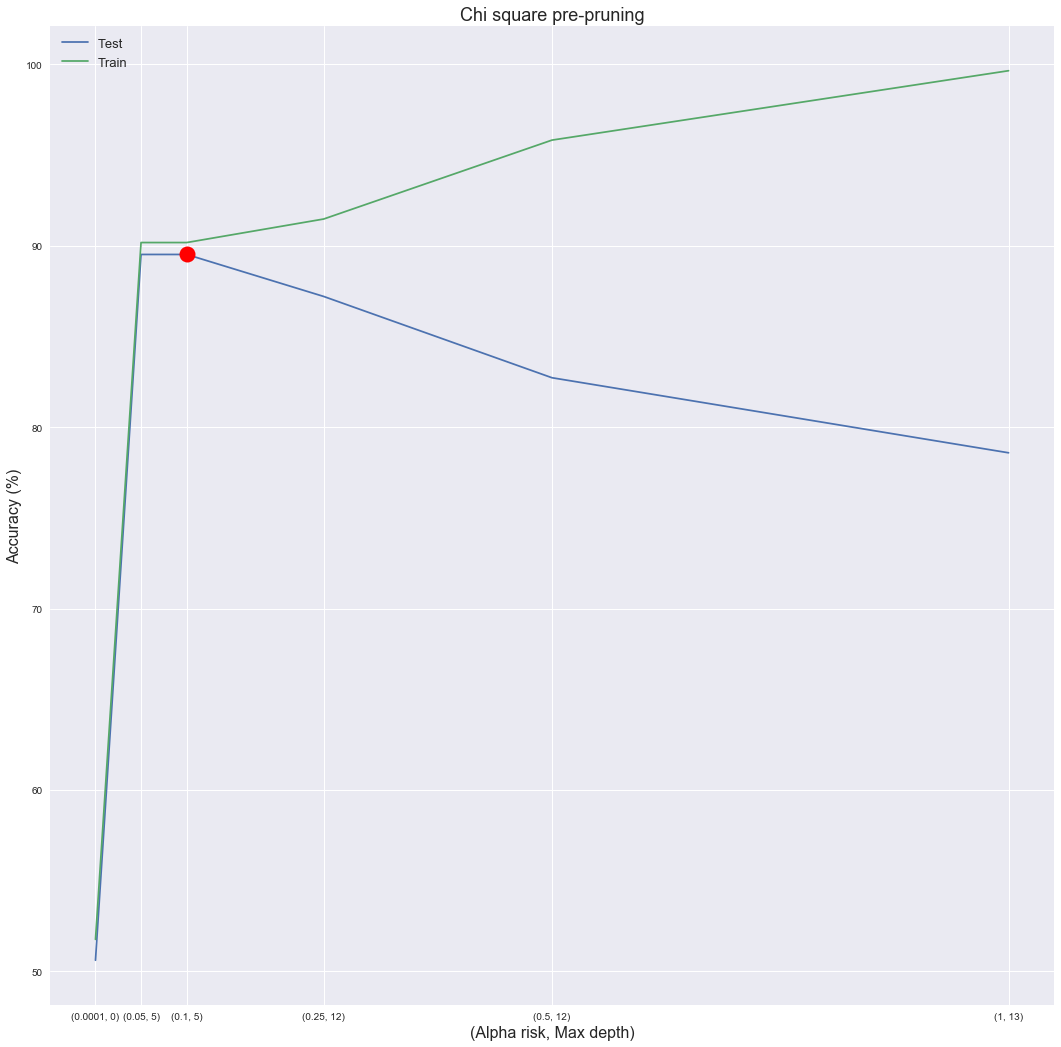

In [33]:
#### Your code here ####
plt.style.use('seaborn')
fig = plt.figure(figsize=(18,18))
npDepthArray = np.arange(6) 
npTestArray = np.arange(6.0) 
npTrainArray = np.arange(6.0)
featureList=list(range(0,len(X_train[0])-1))
alpahList = list((chi_table.get(1)).keys())
alpahList.insert(0,1)
alphaAndDepthList=[]

i=0
for alphaRisk in(alpahList):  
    rootI=build_tree(X_train,calc_entropy,featureList,True,alphaRisk,1000,chi_table)    
    npTrainArray[i] = calc_accuracy(rootI,X_train)
    npTestArray[i] = calc_accuracy(rootI,X_test)
    npDepthArray[i] = rootI.getMaxDepthOfTree(0)
    #Create a tuple of (p-value, max depth)
    alphaAndDepthList.append(("("+str(alphaRisk)+", "+ str(npDepthArray[i])+")"))
    i=i+1

npAlpahArray=np.array(alpahList, dtype = np.float32)
#Change axis X to a tuple of(p-value, max depth)
plt.xticks(npAlpahArray,alphaAndDepthList)
#Mark the best result on the test data
maxTest = np.array(np.amax(npTestArray))
indexMaxTest = np.where(npTestArray == maxTest)[0][0]
plt.plot(npAlpahArray,npTestArray,label='Test')
plt.plot(npAlpahArray,npTrainArray,label='Train')
plt.xlabel('(Alpha risk, Max depth)',fontsize='16')
plt.ylabel('Accuracy (%)',fontsize='16')

plt.legend(loc='upper left',fontsize='13',title='')
plt.title ('Chi square pre-pruning', fontsize = '18')
plt.plot(npAlpahArray[indexMaxTest],maxTest, marker='o', linestyle='-', color='red',markersize = 16)

plt.show()

Build the best 2 trees:
1. tree_max_depth - the best tree according to max_depth pruning
1. tree_chi - the best tree according to chi square pruning

In [22]:
#### Your code here ####
currentFeatureList = list(range(0,len(X_train[0])-1))
tree_max_depth=build_tree(X_train, calc_entropy, currentFeatureList, True,1,4,chi_table)
tree_chi=build_tree(X_train, calc_entropy, currentFeatureList, True,0.1,1000,chi_table)

## Number of Nodes

(5 points) 

Of the two trees above we will choose the one with fewer nodes.

Complete the function counts_nodes and print the number of nodes in each tree

In [23]:
def count_nodes(node):
    """
    
    Count the number of node in a given tree
 
    Input:
    - node: a node in the decision tree.
 
    Output: the number of node in the tree.
    """
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    count = 0
    #Stop condition of the recursive call
    if(len(node.children)==0):
        return 0
    else:
        #Count the Root node
        if(node.valueOfFatherfeature == 'ROOT'):
            count = count + 1
        for currentNodeChild in node.children:
            count = count + 1 + count_nodes(currentNodeChild)   
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return count

In [24]:
#################################
######### Print Check ###########
#################################
print(count_nodes(tree_max_depth))
print(count_nodes(tree_chi))

205
55


## Print the tree

(5 points)

Complete the function `print_tree` and execute it on your chosen tree. Your code should do print:
```
[ROOT, feature=X0],
  [X0=a, feature=X2]
    [X2=c, leaf]: [{1.0: 10}]
    [X2=d, leaf]: [{0.0: 10}]
  [X0=y, feature=X5], 
       [X5=a, leaf]: [{1.0: 5}]
       [X5=s, leaf]: [{0.0: 10}]
  [X0=e, leaf]: [{0.0: 25, 1.0: 50}]
```
In each brackets:
* The first argument is the parent feature with the value that led to current node
* The second argument is the selected feature of the current node
* If the current node is a leaf, you need to print also the labels and their counts

In [25]:
# you can change the function signeture
def print_tree(node, depth=0, parent_feature='ROOT', feature_val='ROOT'):
    '''
    prints the tree according to the example above

    Input:
    - node: a node in the decision tree

    This function has no return value
    '''
         
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    #Create the indentation String
    indentation = "\t" * depth
    #Print string for leaf node
    if node.splitFeature=='leaf':
        zeroFeatureLine=""
        oneFeatureLine=""
        valueLeafLine=""
        #Check if the leaf is monochromatic 
        if(node.getAmountOfPoision()>0):
            zeroFeatureLine="0.0: %s" % (node.getAmountOfPoision())
        if(node.getAmountOfEdible()>0):
            oneFeatureLine="1.0: %s" % (node.getAmountOfEdible())
        if(node.isPure()==False):            
            valueLeafLine="%s, %s" % (zeroFeatureLine, oneFeatureLine)
        else:
            valueLeafLine="%s%s" % (zeroFeatureLine, oneFeatureLine)
        currentLine = "[X%s=%s, leaf]: [{%s}]" % (node.father.splitFeature,node.valueOfFatherfeature,valueLeafLine)            
        print("%s%s" % (indentation, currentLine))
        return
    else:
        #Print string for non leaf node and Root node
        if(node.valueOfFatherfeature!='ROOT'):
            currentLine = "[X%s=%s, feature=X%s]" % (node.father.splitFeature, node.valueOfFatherfeature,node.splitFeature)
            print("%s%s" % (indentation, currentLine))
        else:
            currentLine = "[%s, feature=X%s]" % (node.valueOfFatherfeature, node.splitFeature)
            print("%s%s" % (indentation, currentLine))
        depth += 1
        for currentChild in node.children:                       
                print_tree(currentChild, depth)  
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################

In [26]:
#################################
######### Print Check ###########
#################################
print_tree(tree_chi)

[ROOT, feature=X4]
	[X4=a, feature=X2]
	[X4=c, feature=X6]
	[X4=f, feature=X10]
		[X10=f, feature=X2]
			[X2=b, feature=X19]
			[X2=g, feature=X0]
			[X2=w, feature=X8]
		[X10=k, feature=X11]
		[X10=s, feature=X19]
	[X4=l, feature=X1]
		[X1=f, feature=X0]
		[X1=s, feature=X2]
		[X1=y, feature=X20]
	[X4=m, feature=X0]
	[X4=n, feature=X7]
		[X7=b, feature=X18]
			[X18=b, feature=X0]
			[X18=k, feature=X11]
			[X18=n, feature=X15]
			[X18=o, feature=X19]
				[X19=c, feature=X0]
				[X19=v, leaf]: [{1.0: 16}]
			[X18=r, feature=X8]
			[X18=w, feature=X13]
			[X18=y, feature=X0]
		[X7=n, feature=X3]
			[X3=f, feature=X10]
				[X10=f, feature=X1]
				[X10=k, leaf]: [{0.0: 25}]
				[X10=s, feature=X2]
					[X2=c, leaf]: [{1.0: 10}]
					[X2=g, feature=X18]
					[X2=n, feature=X18]
					[X2=r, feature=X8]
					[X2=u, leaf]: [{1.0: 14}]
					[X2=w, feature=X0]
				[X10=y, leaf]: [{0.0: 7}]
			[X3=t, leaf]: [{0.0: 8}]
	[X4=p, feature=X0]
		[X0=f, feature=X18]
			[X18=k, feature=X8]
			[X18=n, fe